<a href="https://githubtocolab.com/alsinmr/ConferenceExamples/blob/master/PraktikumPhysik/NormalVerteilungMunzeWerfen.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

# Normal Verteilung
In diese Übung, vergleichen wir die Ergebnisse von Münze werfen mit eine Normal Verteilung.

# Teil 1: Experiment
Zuerst, werfen wir 16 Münzen, und zählen wir wie viele sind Zahl (oder Kopf). Wir machen das so oft wie möglich in 5 Minute. Mit viele Proben, bekommen wir bessere Statistisch.

In [22]:
n=16     #Wie viele Versuche
p=0.5    #Wahrscheinlichkeit Zahl
N=[9,  8, 11,  7,  9,  7,  4,  6, 10,  9,  7,  5,  5,  8,  7,  5, 11,
        4,  9,  9, 11, 12, 11,  9,  4,  8,  8, 11,  9, 10, 10,  7, 10,  7,
        7,  5,  5,  7, 10, 10,  8,  7,  7,  8,  7, 11,  7,  9,  7,  9, 10,
        8, 11,  5,  8,  5,  6, 10,  7,  6,  9, 11,  9,  9,  8,  6,  9,  5,
        5,  6,  5,  7,  9,  7,  5] #Ergebnisse

In [30]:
mu=sum(N)/len(N)
sigma=(sum([(n0-mu)**2 for n0 in N])/(len(N)-1))**0.5

mu_genau=n0/2
sigma_genau=(n*(1-p)*p)**0.5

sigma_mittelwert=sigma/len(N)**0.5

print(f'mu = {mu:.2f} Zahl (Experiment, genauer Wert {mu_genau:.2f})')
print(f'sigma = {sigma:.2f} Zahl (Experiment, genauer Wert {sigma_genau:.2f})')

print(f'Unsicherheit des Mittelwert: {sigma_mittelwert:.2f} Zahl')

mu = 7.83 Zahl (Experiment, genauer Wert 8.00)
sigma = 2.06 Zahl (Experiment, genauer Wert 2.00)
Unsicherheit des Mittelwert: 0.24 Zahl


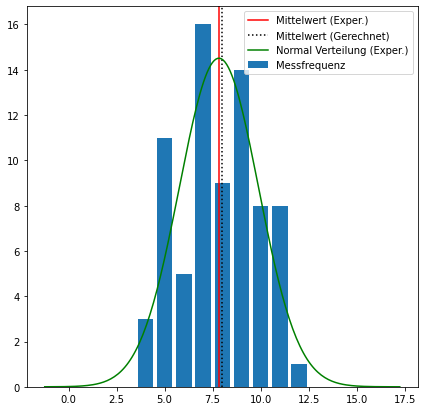

In [51]:
import matplotlib.pyplot as plt
import numpy as np

bins=np.arange(18)-.5
fig,ax=plt.subplots()
fig.set_size_inches([7,7])
ax.bar(bins[:-1]+0.5,np.histogram(N,bins)[0])
ax.set_ylim(ax.get_ylim())
ax.plot(mu*np.ones(2),ax.get_ylim(),color='red')
ax.plot(mu_genau*np.ones(2),ax.get_ylim(),color='black',linestyle=':')
x=np.linspace(*ax.get_xlim(),200)
ax.plot(x,1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))*len(N),color='green')
# ax.plot(x,1/np.sqrt(2*np.pi*sigma_genau**2)*np.exp(-(x-mu_genau)**2/(2*sigma_genau**2))*len(N),color='grey',linestyle='--')
ax.legend(('Mittelwert (Exper.)','Mittelwert (Gerechnet)','Normal Verteilung (Exper.)','Messfrequenz'),loc='upper right')

## Teil 2: Simuliert
Wir machen diese Versuch wieder, aber jetzt mit ein Zufallszahlengenerator, so dass wir können ganz viel Würfeln machen.

In [86]:
n=128     #Wie viele Versuche
p=0.5    #Wahrscheinlichkeit Zahl
N=np.random.binomial(n,p,10000)  #10000 Wuerfeln

In [87]:
mu=sum(N)/len(N)
sigma=(sum([(n0-mu)**2 for n0 in N])/(len(N)-1))**0.5

mu_genau=n0/2
sigma_genau=(n*(1-p)*p)**0.5

sigma_mittelwert=sigma/len(N)**0.5

print(f'mu = {mu:.2f} Zahl (Experiment, genauer Wert {mu_genau:.2f})')
print(f'sigma = {sigma:.2f} Zahl (Experiment, genauer Wert {sigma_genau:.2f})')

print(f'Unsicherheit des Mittelwert: {sigma_mittelwert:.2f} Zahl')

mu = 63.99 Zahl (Experiment, genauer Wert 8.00)
sigma = 5.66 Zahl (Experiment, genauer Wert 5.66)
Unsicherheit des Mittelwert: 0.06 Zahl


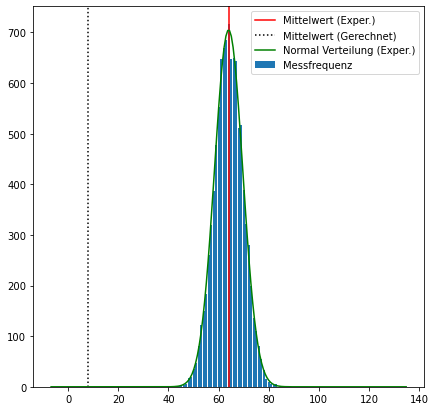

In [88]:
bins=np.arange(n+2)-.5
fig,ax=plt.subplots()
fig.set_size_inches([7,7])
ax.bar(bins[:-1]+0.5,np.histogram(N,bins)[0])
ax.set_ylim(ax.get_ylim())
ax.plot(mu*np.ones(2),ax.get_ylim(),color='red')
ax.plot(mu_genau*np.ones(2),ax.get_ylim(),color='black',linestyle=':')
x=np.linspace(*ax.get_xlim(),200)
ax.plot(x,1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))*len(N),color='green')
# ax.plot(x,1/np.sqrt(2*np.pi*sigma_genau**2)*np.exp(-(x-mu_genau)**2/(2*sigma_genau**2))*len(N),color='grey',linestyle='--')
ax.legend(('Mittelwert (Exper.)','Mittelwert (Gerechnet)','Normal Verteilung (Exper.)','Messfrequenz'),loc='upper right')